# CSC280, Introduction to Computer Science I
# Prof. Adam C. Knapp
# Lists, Primes, and Gambling

Regular variables are pretty nice, but they can only store value at a time. A lot of the time, we will need to store _lots_ of data. **Arrays** are one of the ways that we can do that. "**List**" is the name of Python's particular version of the array type.

You want to think of an list/array as a bunch of things all written down in a row. The syntax looks like this:
```
arr1 = ["An", "Array", "of", "strings"]
```
Note the square braces and commas. Python's lists can store varied kinds of data, like mixtures of integers and strings:
```
arr2 = [1, "hat"]
```
I don't really recommend doing that, though. You usually want to be able to do the same operation to every element of the array.

So how do we get at the individual elements of a list? Well, if we look at `arr1`, the elements are `arr1[0]`, `arr1[1]`, `arr1[2]`, and `arr1[3]`. Remeber how `range(4)` was 0, 1, 2, 3? Same thing for the list's **indices**.

**First task:** Make a list using the code below.
```
arr = [1, 2, 3, 'four']
```
Then add a second command which changes `'four'` to `4`.

Creating lists manually is a pain; by-hand data entry is the worst. That's why we have some nice features like list-comprehension. 

Suppose that we want to create a list, `numbers`, that contains the numbers one through twenty.
```
numbers = [ n+1 for n in range(20) ]
```
**Try it.**

Python's lists are "resizable". You can add more things onto the end with the `append` command.

Try adding the number 21 to the end of `numbers` by:
```
numbers.append(21)
```

Can you create a list `squares` which contains the first twenty perfect squares?

What about a list `nada` which contains 100 zeros?

## [Eratothenes' seive](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

Eratosthenese was a Greek mathematician who served as the chief Librarian at the [Library of Alexandria](https://en.wikipedia.org/wiki/Library_of_Alexandria) and was the first known person to calculate the circumference of the Earth. Another of his accomplishments was to find a method (an *algorithm*) for quickly finding prime numbers!

Let's program his algorithm in Python and find all of the primes up to 1000!

Make a list `is_prime` which contains the value `True` 1001 times.

We want the list `is_prime` will contain, at index `n`, the answer to the question: "is `n` prime?". We know that 0 and 1 are not prime, so let's do those as a special case first.

Set `is_prime[0]` and `is_prime[1]` to `False`

Now, the main part of the algorithm goes like this:

1. Walk down the list until you see a `True`. This should happen at a prime number index. (The first time this will happen at index 2.) 
2. Give the index a name, `p`
3. Starting at index `p`, move `p` steps forward in the list and store a `False` there. Keep doing this until you run off of the list. (index `p` should still read `True`) These correspond to *multiples* of `p` and can't be prime.
4. Go back to index `p` and look for the next `True` in the list. If you can find one, go to step 2.

We want to write code that performs this algorthim! Before you write any code, think about
* What parts of the code repeat?
* Do the parts that repeat nest inside each other?
* Can you simplify things using `range` with a different step size? Or maybe a `while` loop?


Write a loop that walks down the `is_prime` list and prints the list index whenever you see a `True`. Those are the primes! What is the largest prime under 1000?

## Numpy arrays

There's another kind of array which you can use! It comes from a Python library called [NumPy](http://www.numpy.org/) which is a wonderful library for numerical computing in Python. First we have to import it.

In [8]:
# you don't want to have to type numpy all the time, do you?
# nobody else does either, so we can import with an abreviation
# this abbrev. is an informal standard
import numpy as np

There are some pretty typical starting points for numerical computation, like starting with an array of all zeros. NumPy has that. Suppose we want an array of 200 zeros? 
```
np.zeros(shape=200)
```
**Try it.**

They'll be floating point by default, but you can change it. (Look it up in the NumPy docs.)

We'll need this below. Suppose that you want something to happen _randomly_, 25% of the time. Well, first you'll need to import the "random" package.
```
import random
```
That gets you a function which spits out numbers in the interval $[0,1)$, all with equal probability. Now
```
if random.random() < 0.25:
    print("it happened")
else:
    print("it didn't happen")
```
You can adjust the probability by changing the `0.25`. **Try it out.**

Ok, so let's actually do something with arrays! Maybe you've heard of the [Gambler's Ruin](https://en.wikipedia.org/wiki/Gambler%27s_ruin)? The basic idea is that you have a gambler who starts of with a certain, fixed, amount of money; let's say 10 dollars.

Each turn, the gambler bets one dollar on a fair coin flip. 
* If it's heads, they win two dollars. 
* If it's tails, they win nothing.

Equivalently, each turn they gain or lose a dollar with 50% probability.

If the gambler ever runs out of money, they are out. We can mathematically prove that this, essentially, _always_ _happens_.

We want to simulate this game and find out how long it usually takes to go broke!

Here's what we'll do:
* Create an array `data` of all zeros. It should have 4000 elements. We'll use the entry `data[k]` to store the count of the number of times we went broke on the `k+1`st turn. i.e. `data[0]` stores the number of times we went broke on the first turn, `data[1]` on the second turn, etc.
* Repeat the following many, many times: (maybe 100,000 times)
> - Give the gambler 20 bucks and set the turn count to zero
> - As long as the gambler still has money and the turn count is less than 4000, have them make the bet
> - Whenever you stop because the gambler has run out of money, update the count in `data` (Don't do anything when the turn count runs over 4000.)


Allright, let's get to work! **Write the code with at least one friend. One does the typing, one does the telling.**

Of course, getting a bunch of data is kind of pointless if you can't see it. The code below will use [matplotlib](https://matplotlib.org/) to plot and display it in the notebook.

In [41]:
# definitely don't want to type _that_ a lot
import matplotlib.pyplot as plt
# make sure that jupyter and matplotlib know where to put the plot
%matplotlib inline

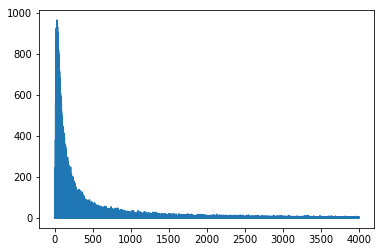

In [42]:
plt.plot(range(4000),data)